# Demo of Ch6. Generative Adversarial Network
----
This is the sample code of TU-ETP-AD1062 Machine Learning Fundamentals.

For more information, please refer to:
https://sites.google.com/view/tu-ad1062-mlfundamentals/

## Import Packages
----

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import mnist
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

%matplotlib inline

## Load Dataset
----

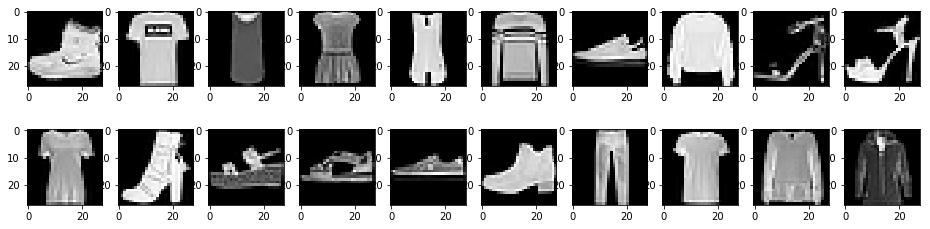

In [17]:
(I_train, y_train), (I_test, y_test) = fashion_mnist.load_data()

I_train = np.array(I_train) / 255.0
y_train = np.array(y_train)

I_test = np.array(I_test) / 255.0
y_test = np.array(y_test)

X_train = I_train.reshape((len(I_train), np.prod(I_train.shape[1:])))
X_test = I_test.reshape((len(I_test), np.prod(I_test.shape[1:])))

plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(I_train[i,:], cmap='gray')

## 6.1. Auto-encoder

### Demo 6.1.1. Auto-Encoder
---

In [13]:
encoding_dim = 32

def build_autoencoder():
    input_img = Input(shape=(784,))
    
    encoded = Dense(encoding_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Auto-Encoder
    autoencoder = Model(input_img, decoded)

    # Encoder
    encoder = Model(input_img, encoded)

    # Decoder
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    
    return autoencoder, encoder, decoder

In [19]:
autoencoder, encoder, decoder = build_autoencoder()
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.5317 - val_loss: 0.4672
Epoch 2/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.4345 - val_loss: 0.4104
Epoch 3/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.3993 - val_loss: 0.3921
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3827 - val_loss: 0.3766
Epoch 5/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.3681 - val_loss: 0.3637
Epoch 6/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3566 - val_loss: 0.3538
Epoch 7/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.3478 - val_loss: 0.3460
Epoch 8/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3409 - val_loss: 0.3399
Epoch 9/50
60000/60000 [==============================] - 4s 5

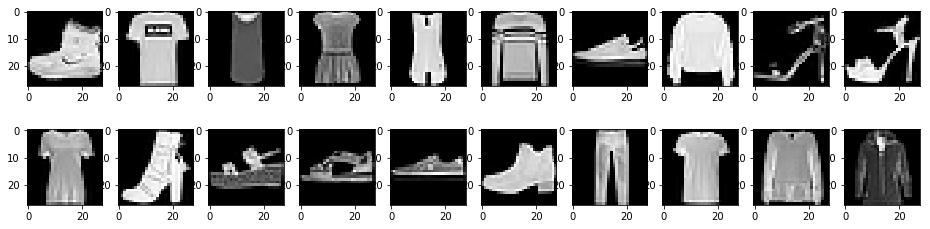

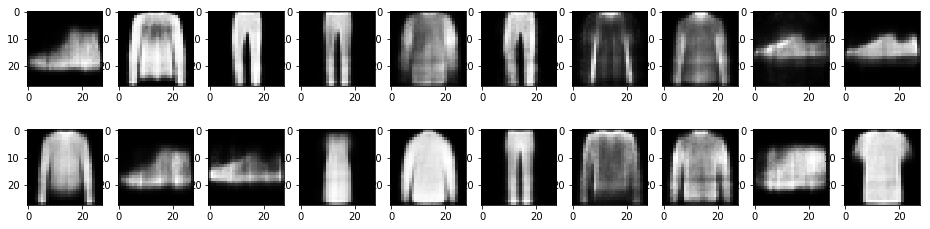

In [22]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(I_train[i,:], cmap='gray')

plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(decoded_imgs[i,:].reshape(28, 28), cmap='gray')